In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import attila_utils

In [2]:
treatments = {
    'A': 'Amiloride',
    'B': 'HCQ',
    'C': 'HCQ nano',
    'D': 'Saline',
    'E': 'R-HCQ',
    'F': 'S-HCQ',
    'G': 'TUDCA',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

In [3]:
fpath = '../../resources/QPS/5xFAD-mouse/CO28152_NFL-GFAP_datasum.xlsx'
nfl_invivo = pd.read_excel(fpath, sheet_name='NFL in vivo clean')
#nfl_invivo = nfl_invivo.melt(id_vars=['Cohort', 'Group', 'IRN', 'Sex', 'Genotype'], value_name='NF-L')
#nfl_invivo['Week'] = nfl_invivo.variable.str.replace('NF-L week ', '').astype(int)
nfl_invivo['IRN'] = nfl_invivo.IRN.astype('str')
nfl_invivo['Sex'] = pd.Categorical(nfl_invivo['Sex'], categories=['m', 'f'], ordered=True)
nfl_invivo['NF-L week 0-4 change'] = nfl_invivo.apply(lambda r: r.loc['NF-L week 4'] / r.loc['NF-L week 0'], axis=1)
nfl_invivo['NF-L week 0-8 change'] = nfl_invivo.apply(lambda r: r.loc['NF-L week 8'] / r.loc['NF-L week 0'], axis=1)
nfl_invivo['NF-L week 0-12 change'] = nfl_invivo.apply(lambda r: r.loc['NF-L week 12'] / r.loc['NF-L week 0'], axis=1)
data = nfl_invivo[['Group', 'Sex', 'Genotype', 'NF-L week 0-4 change', 'NF-L week 0-8 change', 'NF-L week 0-12 change']]
data = pd.concat([data, data.Group.apply(lambda g: treatments[g]).to_frame('Treatment')], axis=1)
data.head()

,Group,Sex,Genotype,NF-L week 0-4 change,NF-L week 0-8 change,NF-L week 0-12 change,Treatment
0,A,f,tg/wt,1.494792,1.314236,1.192708,Amiloride
1,A,f,tg/wt,1.492837,1.121777,0.922636,Amiloride
2,A,f,tg/wt,1.547789,0.965763,1.088445,Amiloride
3,A,f,tg/wt,1.236934,1.198606,1.790941,Amiloride
4,A,m,tg/wt,1.920962,1.295533,1.505155,Amiloride


In [4]:
value_vars = ['NF-L week 0-4 change', 'NF-L week 0-8 change', 'NF-L week 0-12 change']
id_vars = ['Group', 'Sex', 'Genotype', 'Treatment']
datalong = data.melt(value_vars=value_vars, id_vars=id_vars, value_name='NF-L change', var_name='Duration')
datalong['Duration'] = datalong.Duration.str.replace('NF-L ', '').str.replace(' change', '')
datalong

,Group,Sex,Genotype,Treatment,Duration,NF-L change
0,A,f,tg/wt,Amiloride,week 0-4,1.494792
1,A,f,tg/wt,Amiloride,week 0-4,1.492837
2,A,f,tg/wt,Amiloride,week 0-4,1.547789
3,A,f,tg/wt,Amiloride,week 0-4,1.236934
4,A,m,tg/wt,Amiloride,week 0-4,1.920962
...,...,...,...,...,...,...
172,J,f,wt/wt,DMSO WT,week 0-12,1.200000
173,J,f,wt/wt,DMSO WT,week 0-12,1.296296
174,J,m,wt/wt,DMSO WT,week 0-12,0.685714
175,J,m,wt/wt,DMSO WT,week 0-12,1.128205


/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

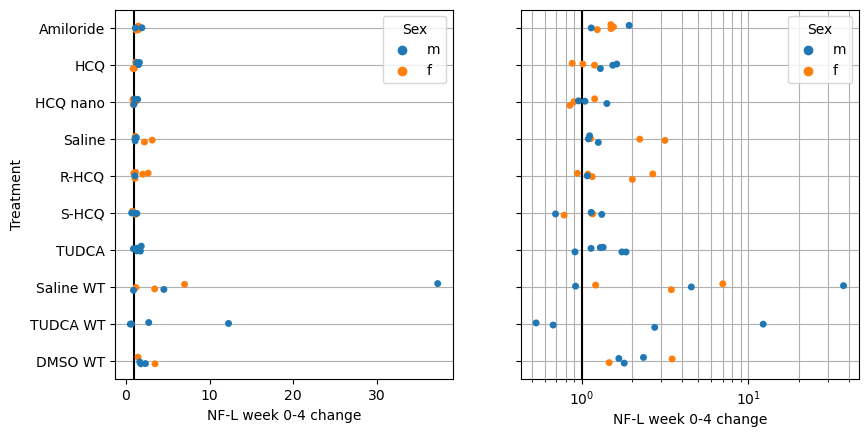

In [5]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9.6, 4.8))
for axi in ax:
    axi.axvline(1, color='k')
    sns.stripplot(data=data, x='NF-L week 0-4 change', y='Treatment', hue='Sex', ax=axi)
    axi.grid(axis='y')

ax[1].grid(axis='x', which='both')
ax[1].set_xscale('log')

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

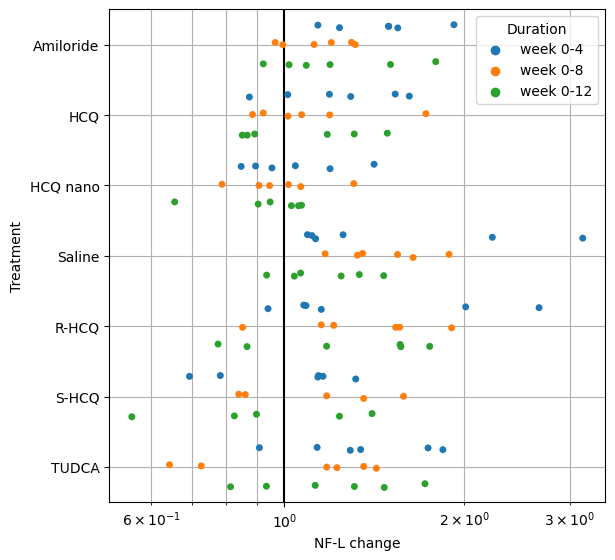

In [6]:
fig, ax = plt.subplots(figsize=(6.4, 6.4))
ax.axvline(1, color='k')
sns.stripplot(data=datalong.loc[~ datalong.Treatment.isin(['Saline WT', 'TUDCA WT', 'DMSO WT'])], x='NF-L change', y='Treatment', hue='Duration', dodge=True, ax=ax)
ax.grid(axis='x', which='both')
ax.grid(axis='y')
ax.set_xscale('log')

In [7]:
data_wt = data.loc[data.Treatment.isin(['Saline WT', 'TUDCA WT', 'DMSO WT'])]
data_tg = data.loc[~ data.Treatment.isin(['Saline WT', 'TUDCA WT', 'DMSO WT'])].copy()
data_tg['Treatment'] = pd.Categorical(data_tg.Treatment, categories=['Saline', 'Amiloride', 'HCQ', 'HCQ nano', 'R-HCQ', 'S-HCQ', 'TUDCA'], ordered=True)

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

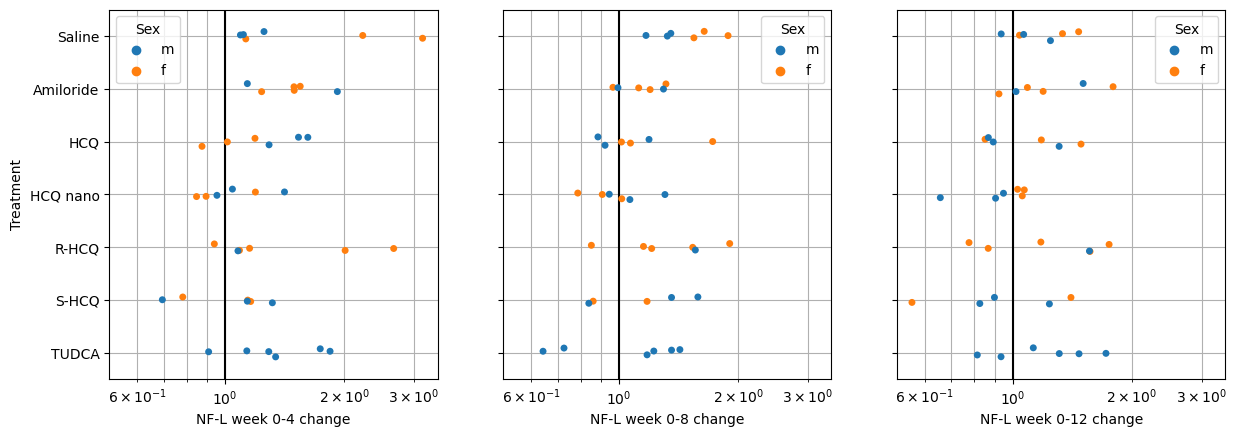

In [8]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(14.4, 4.8))
for axi, x in zip(ax, ['NF-L week 0-4 change', 'NF-L week 0-8 change', 'NF-L week 0-12 change']):
    axi.axvline(1, color='k')
    sns.stripplot(data=data_tg, x=x, y='Treatment', hue='Sex', ax=axi)
    axi.set_xscale('log')
    axi.grid(axis='x', which='both')
    axi.grid(axis='y')


In [9]:
data.head()

,Group,Sex,Genotype,NF-L week 0-4 change,NF-L week 0-8 change,NF-L week 0-12 change,Treatment
0,A,f,tg/wt,1.494792,1.314236,1.192708,Amiloride
1,A,f,tg/wt,1.492837,1.121777,0.922636,Amiloride
2,A,f,tg/wt,1.547789,0.965763,1.088445,Amiloride
3,A,f,tg/wt,1.236934,1.198606,1.790941,Amiloride
4,A,m,tg/wt,1.920962,1.295533,1.505155,Amiloride


In [10]:
formula = 'np.log(Q("NF-L week 0-4 change")) ~ 1 + Treatment'
result = smf.ols(formula, data=data_tg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     np.log(Q("NF-L week 0-4 change"))   R-squared:                       0.220
Model:                                           OLS   Adj. R-squared:                  0.087
Method:                                Least Squares   F-statistic:                     1.647
Date:                               Fri, 05 Jan 2024   Prob (F-statistic):              0.163
Time:                                       23:41:20   Log-Likelihood:                -5.4543
No. Observations:                                 42   AIC:                             24.91
Df Residuals:                                     35   BIC:                             37.07
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4153      0.123      3.370      0.002       0.165       0.665
Treatment[T.Amiloride]    -0.0428      0.174     -0.246      0.807      -0.397       0.311
Treatment[T.HCQ]          -0.2124      0.174     -1.219      0.231      -0.566       0.141
Treatment[T.HCQ nano]     -0.3750      0.174     -2.152      0.038      -0.729      -0.021
Treatment[T.R-HCQ]        -0.0957      0.174     -0.549      0.586      -0.449       0.258
Treatment[T.S-HCQ]        -0.4028      0.174     -2.311      0.027      -0.757      -0.049
Treatment[T.TUDCA]        -0.1248      0.174     -0.716      0.479      -0.479       0.229
==============================================================================
Omnibus:                        3.310   Durbin-Watson:                   2.397
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.881
Skew:                           0.638   Prob(JB):                        0.237
Kurtosis:                       2.861   Cond. No.                         7.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
formula = 'np.log(Q("NF-L week 0-8 change")) ~ 1 + Treatment'
result = smf.ols(formula, data=data_tg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     np.log(Q("NF-L week 0-8 change"))   R-squared:                       0.255
Model:                                           OLS   Adj. R-squared:                  0.124
Method:                                Least Squares   F-statistic:                     1.942
Date:                               Fri, 05 Jan 2024   Prob (F-statistic):              0.102
Time:                                       23:41:20   Log-Likelihood:                 4.1976
No. Observations:                                 41   AIC:                             5.605
Df Residuals:                                     34   BIC:                             17.60
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3843      0.098      3.925      0.000       0.185       0.583
Treatment[T.Amiloride]    -0.2530      0.138     -1.827      0.076      -0.534       0.028
Treatment[T.HCQ]          -0.2845      0.138     -2.055      0.048      -0.566      -0.003
Treatment[T.HCQ nano]     -0.3918      0.138     -2.829      0.008      -0.673      -0.110
Treatment[T.R-HCQ]        -0.1027      0.138     -0.742      0.463      -0.384       0.179
Treatment[T.S-HCQ]        -0.2637      0.145     -1.815      0.078      -0.559       0.031
Treatment[T.TUDCA]        -0.3400      0.138     -2.455      0.019      -0.621      -0.059
==============================================================================
Omnibus:                        0.448   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.600
Skew:                          -0.149   Prob(JB):                        0.741
Kurtosis:                       2.488   Cond. No.                         7.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
formula = 'np.log(Q("NF-L week 0-12 change")) ~ 1 + Treatment'
result = smf.ols(formula, data=data_tg).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     np.log(Q("NF-L week 0-12 change"))   R-squared:                       0.169
Model:                                            OLS   Adj. R-squared:                  0.023
Method:                                 Least Squares   F-statistic:                     1.154
Date:                                Fri, 05 Jan 2024   Prob (F-statistic):              0.353
Time:                                        23:41:20   Log-Likelihood:               -0.15045
No. Observations:                                  41   AIC:                             14.30
Df Residuals:                                      34   BIC:                             26.30
Df Model:                                           6                                         
Covariance Type:                            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1541      0.109      1.415      0.166      -0.067       0.375
Treatment[T.Amiloride]     0.0444      0.154      0.288      0.775      -0.269       0.357
Treatment[T.HCQ]          -0.0850      0.154     -0.552      0.584      -0.398       0.228
Treatment[T.HCQ nano]     -0.2252      0.154     -1.463      0.153      -0.538       0.088
Treatment[T.R-HCQ]         0.0491      0.154      0.319      0.752      -0.264       0.362
Treatment[T.S-HCQ]        -0.2209      0.161     -1.368      0.180      -0.549       0.107
Treatment[T.TUDCA]         0.0193      0.154      0.125      0.901      -0.294       0.332
==============================================================================
Omnibus:                        2.564   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.527
Skew:                          -0.185   Prob(JB):                        0.466
Kurtosis:                       2.130   Cond. No.                         7.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
%connect_info

{
  "shell_port": 64386,
  "iopub_port": 64387,
  "stdin_port": 64388,
  "control_port": 64390,
  "hb_port": 64389,
  "ip": "127.0.0.1",
  "key": "e7d58a3c-17461596053f7b080759fe67",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d4619992-2667-4549-8128-87366449d66e.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
